# Arbaz Khan
## 2020076
***

* ### Task 1

In [2216]:
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px

In [2217]:
#Fetching data from the file
with open('Sample data-1-IRIS-1.txt', 'r') as file:
    
    rows = int(file.readline())
    columns = int(file.readline())
    next(file)
    data = []
    for line in file:
        values = line.split('\t')
        values = filter(lambda x: x.strip(), values)
        row = list(map(float, values))
        data.append(row)

data = np.array(data)

In [2218]:
#Function to calculate Pearson’s correlation coefficient 
def coefficient_calculator(x, y):
    x_sum = sum(x)
    x_len = len(x)
    y_sum = sum(y)
    y_len = len(y)
    x_mean = x_sum/x_len
    y_mean = y_sum/y_len
    
    num_values = []
    
    for i,j in zip(x,y):
        i = i-x_mean
        j = j-y_mean
        z = i*j
        num_values.append(z)
        
    numerator = sum(num_values)
    
    a = []
    b = []
    
    for i,j in zip(x,y):
        i = (i-x_mean)**2
        j = (j-y_mean)**2
        
        a.append(i)
        b.append(j)
    
    denominator = math.sqrt(sum(a) * sum(b))
    
    return (numerator/denominator)

In [2219]:
#Constructing correlation matrix
correlation_matrix = []

for i in range(len(data)):
    pc_coefficients = []
    for j in range(len(data)):
        pc_coefficients.append(coefficient_calculator(data[i], data[j]))          
    correlation_matrix.append(pc_coefficients) 

correlation_matrix = np.array(correlation_matrix)
correlation_matrix

array([[1.        , 0.99599866, 0.99997391, ..., 0.65347343, 0.6339168 ,
        0.63315839],
       [0.99599866, 1.        , 0.99660709, ..., 0.70898277, 0.68625679,
        0.68483481],
       [0.99997391, 0.99660709, 1.        , ..., 0.65755616, 0.63763128,
        0.6368058 ],
       ...,
       [0.65347343, 0.70898277, 0.65755616, ..., 1.        , 0.99570813,
        0.99446012],
       [0.6339168 , 0.68625679, 0.63763128, ..., 0.99570813, 1.        ,
        0.99991588],
       [0.63315839, 0.68483481, 0.6368058 , ..., 0.99446012, 0.99991588,
        1.        ]])

In [2220]:
#Discretize:
discrete_matrix = np.copy(correlation_matrix)
column_means = np.mean(discrete_matrix, axis = 0)
for i in range(len(discrete_matrix)):
    for j in range(len(discrete_matrix)):
        if(discrete_matrix[i][j] < column_means[j]):
            discrete_matrix[i][j] = 0
        else:
            discrete_matrix[i][j] = 1

discrete_matrix = discrete_matrix.astype(int)
discrete_matrix

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [2221]:
plot = px.imshow(discrete_matrix, binary_string = True)
plot.show(config = {'scrollZoom': True})

In [2222]:
#Colorize:
color_matrix = np.copy(correlation_matrix)
column_max = np.max(color_matrix, axis = 0)
for i in range(len(color_matrix)):
    for j in range(len(color_matrix)):
            color_matrix[i][j] = ((color_matrix[i][j]/column_max[j])*255)

color_matrix

array([[255.        , 253.97965862, 254.99334732, ..., 166.63572491,
        161.64878423, 161.45538965],
       [253.97965862, 255.        , 254.13480685, ..., 180.79060711,
        174.9954812 , 174.63287614],
       [254.99334732, 254.13480685, 255.        , ..., 167.6768204 ,
        162.59597629, 162.38547938],
       ...,
       [166.63572491, 180.79060711, 167.6768204 , ..., 255.        ,
        253.90557203, 253.58733089],
       [161.64878423, 174.9954812 , 162.59597629, ..., 253.90557203,
        255.        , 254.97854866],
       [161.45538965, 174.63287614, 162.38547938, ..., 253.58733089,
        254.97854866, 255.        ]])

In [2223]:
plot = px.imshow(correlation_matrix, color_continuous_scale = "greens")
plot.show(config = {'scrollZoom': True})

* ### Task 2

In [2224]:
#Permute data matrix
permuted_data = np.copy(data)
np.random.shuffle(permuted_data)
permuted_data

array([[5.5, 4.2, 1.4, 0.2],
       [5.8, 2.6, 4. , 1.2],
       [5.5, 2.5, 4. , 1.3],
       [5. , 2. , 3.5, 1. ],
       [5. , 3.5, 1.6, 0.6],
       [6.7, 3.3, 5.7, 2.1],
       [5.9, 3. , 5.1, 1.8],
       [5.4, 3.4, 1.5, 0.4],
       [5.7, 2.8, 4.1, 1.3],
       [6.9, 3.2, 5.7, 2.3],
       [5.1, 3.5, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [6.8, 3.2, 5.9, 2.3],
       [5.1, 3.7, 1.5, 0.4],
       [6.4, 2.7, 5.3, 1.9],
       [5.2, 4.1, 1.5, 0.1],
       [6.8, 2.8, 4.8, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [7. , 3.2, 4.7, 1.4],
       [4.4, 2.9, 1.4, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [6.7, 3. , 5. , 1.7],
       [4.9, 2.5, 4.5, 1.7],
       [5.7, 2.6, 3.5, 1. ],
       [4.4, 3. , 1.3, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [5.6, 2.5, 3.9, 1.1],
       [6.5, 2.8, 4.6, 1.5],
       [5.1, 3.3, 1.7, 0.5],
       [5.2, 3.4, 1.4, 0.2],
       [6.1, 2.6, 5.6, 1.4],
       [5.4, 3. , 4.5, 1.5],
       [5.4, 3

In [2225]:
#Constructing correlation matrix
correlation_matrix_permuted = []

for i in range(len(permuted_data)):
    pc_coefficients = []
    for j in range(len(permuted_data)):
        pc_coefficients.append(coefficient_calculator(permuted_data[i], permuted_data[j]))          
    correlation_matrix_permuted.append(pc_coefficients) 

correlation_matrix_permuted = np.array(correlation_matrix_permuted)
correlation_matrix_permuted

array([[1.        , 0.70929539, 0.67532272, ..., 0.7281086 , 0.56631475,
        0.99259772],
       [0.70929539, 1.        , 0.99880835, ..., 0.99959059, 0.97650692,
        0.78551801],
       [0.67532272, 0.99880835, 1.        , ..., 0.99700502, 0.98534025,
        0.75506131],
       ...,
       [0.7281086 , 0.99959059, 0.99700502, ..., 1.        , 0.9701526 ,
        0.80227916],
       [0.56631475, 0.97650692, 0.98534025, ..., 0.9701526 , 1.        ,
        0.65190817],
       [0.99259772, 0.78551801, 0.75506131, ..., 0.80227916, 0.65190817,
        1.        ]])

In [2226]:
#Discretize:
discrete_matrix_permuted = np.copy(correlation_matrix_permuted)
column_means = np.mean(discrete_matrix_permuted, axis = 0)
for i in range(len(discrete_matrix_permuted)):
    for j in range(len(discrete_matrix_permuted)):
        if(discrete_matrix_permuted[i][j] < column_means[j]):
            discrete_matrix_permuted[i][j] = 0
        else:
            discrete_matrix_permuted[i][j] = 1

discrete_matrix_permuted = discrete_matrix_permuted.astype(int)
discrete_matrix_permuted

array([[1, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 0, 1]])

In [2227]:
plot = px.imshow(discrete_matrix_permuted, binary_string = True)
plot.show(config = {'scrollZoom': True})

In [2228]:
#Caluculating signatures for each row
row_sum = np.sum(permuted_data, axis = 1).tolist()
row_mean = np.mean(permuted_data, axis = 1).tolist()
signatures = []

for i, j in zip(row_sum, row_mean):
    signatures.append(i*j)
    
signatures

[31.922499999999992,
 46.239999999999995,
 44.222500000000004,
 33.0625,
 28.622499999999995,
 79.21000000000001,
 62.410000000000004,
 28.622500000000006,
 48.3025,
 81.90250000000002,
 26.009999999999998,
 23.03999999999999,
 82.80999999999999,
 28.622500000000006,
 66.4225,
 29.7025,
 62.40999999999999,
 94.08999999999999,
 66.42249999999997,
 19.802500000000002,
 60.0625,
 67.24,
 46.239999999999995,
 40.96000000000001,
 19.802500000000002,
 101.00250000000001,
 71.40249999999999,
 79.21000000000001,
 42.902499999999996,
 59.290000000000006,
 28.08999999999999,
 26.009999999999998,
 61.622499999999995,
 51.84,
 29.160000000000004,
 33.0625,
 55.502500000000005,
 49.0,
 30.25000000000001,
 69.7225,
 70.56,
 54.75999999999998,
 59.290000000000006,
 81.90250000000002,
 77.44000000000001,
 22.090000000000003,
 60.84000000000001,
 23.522499999999997,
 60.84000000000001,
 31.359999999999996,
 28.622499999999988,
 73.96000000000002,
 20.702499999999997,
 72.25,
 82.80999999999996,
 82.809

In [2229]:
#Sorting data matrix according to signatures

sort_indices = np.argsort(signatures)

permuted_data = permuted_data[sort_indices]

permuted_data

array([[4.5, 2.3, 1.3, 0.3],
       [4.3, 3. , 1.1, 0.1],
       [4.4, 2.9, 1.4, 0.2],
       [4.4, 3. , 1.3, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.6, 3.2, 1.4, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.8, 3. , 1.4, 0.3],
       [4.9, 3. , 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [4.9, 3.1, 1.5, 0.1],
       [4.9, 3.1, 1.5, 0.1],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.2, 3.4, 1.4, 0.2],
       [5.1, 3.5, 1.4, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.5, 3.5, 1.3, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.1, 3

In [2230]:
#Constructing correlation matrix
correlation_matrix_permuted = []

for i in range(len(permuted_data)):
    pc_coefficients = []
    for j in range(len(permuted_data)):
        pc_coefficients.append(coefficient_calculator(permuted_data[i], permuted_data[j]))          
    correlation_matrix_permuted.append(pc_coefficients) 

correlation_matrix_permuted = np.array(correlation_matrix_permuted)
correlation_matrix_permuted

array([[1.        , 0.97121507, 0.98343651, ..., 0.61421985, 0.77507737,
        0.72351807],
       [0.97121507, 1.        , 0.99666169, ..., 0.45726427, 0.6649542 ,
        0.60849865],
       [0.98343651, 0.99666169, 1.        , ..., 0.52833859, 0.7233699 ,
        0.67060056],
       ...,
       [0.61421985, 0.45726427, 0.52833859, ..., 1.        , 0.96358386,
        0.97547488],
       [0.77507737, 0.6649542 , 0.7233699 , ..., 0.96358386, 1.        ,
        0.99692653],
       [0.72351807, 0.60849865, 0.67060056, ..., 0.97547488, 0.99692653,
        1.        ]])

In [2231]:
#Discretize:
discrete_matrix_permuted = np.copy(correlation_matrix_permuted)
column_means = np.mean(discrete_matrix_permuted, axis = 0)
for i in range(len(discrete_matrix_permuted)):
    for j in range(len(discrete_matrix_permuted)):
        if(discrete_matrix_permuted[i][j] < column_means[j]):
            discrete_matrix_permuted[i][j] = 0
        else:
            discrete_matrix_permuted[i][j] = 1

discrete_matrix_permuted = discrete_matrix_permuted.astype(int)
discrete_matrix_permuted

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [2232]:
plot = px.imshow(discrete_matrix_permuted, binary_string = True)
plot.show(config = {'scrollZoom': True})

In [2233]:
#Colorize:
color_matrix = np.copy(correlation_matrix_permuted)
column_max = np.max(color_matrix, axis = 0)
for i in range(len(color_matrix)):
    for j in range(len(color_matrix)):
            color_matrix[i][j] = ((color_matrix[i][j]/column_max[j])*255)

color_matrix

array([[255.        , 247.65984247, 250.77630901, ..., 156.62606173,
        197.6447284 , 184.49710723],
       [247.65984247, 255.        , 254.14873092, ..., 116.60238774,
        169.56332136, 155.16715461],
       [250.77630901, 254.14873092, 255.        , ..., 134.72634121,
        184.45932529, 171.00314163],
       ...,
       [156.62606173, 116.60238774, 134.72634121, ..., 255.        ,
        245.71388533, 248.7460941 ],
       [197.6447284 , 169.56332136, 184.45932529, ..., 245.71388533,
        255.        , 254.21626471],
       [184.49710723, 155.16715461, 171.00314163, ..., 248.7460941 ,
        254.21626471, 255.        ]])

In [2234]:
plot = px.imshow(color_matrix, color_continuous_scale = "greens")
plot.show(config = {'scrollZoom': True})

* ### Task 3

In [2235]:
#Input threshhold
threshold = input("Enter a value for threshold: ")

#Remove values bleow threshhold
for i in range(len(correlation_matrix_permuted)):
    for j in range(len(correlation_matrix_permuted)):
        if(correlation_matrix_permuted[i][j] < threshold):
            correlation_matrix_permuted[i][j] = 0

correlation_matrix_permuted

array([[1.        , 0.97121507, 0.98343651, ..., 0.61421985, 0.77507737,
        0.72351807],
       [0.97121507, 1.        , 0.99666169, ..., 0.        , 0.6649542 ,
        0.60849865],
       [0.98343651, 0.99666169, 1.        , ..., 0.52833859, 0.7233699 ,
        0.67060056],
       ...,
       [0.61421985, 0.        , 0.52833859, ..., 1.        , 0.96358386,
        0.97547488],
       [0.77507737, 0.6649542 , 0.7233699 , ..., 0.96358386, 1.        ,
        0.99692653],
       [0.72351807, 0.60849865, 0.67060056, ..., 0.97547488, 0.99692653,
        1.        ]])

In [2236]:
weighted_graph = []
 
for i in correlation_matrix_permuted:
    weighted_graph.append(np.sum(i))
    
weighted_graph

[126.87966164595113,
 115.30579525274983,
 122.03202342574605,
 118.70607959260676,
 115.7713082304991,
 122.935189100943,
 118.44444351153838,
 95.00114654287637,
 121.65359619680632,
 117.63553482101588,
 121.87199844504781,
 122.77114369714423,
 117.71060581708122,
 123.38669607938445,
 123.38669607938445,
 123.38669607938445,
 122.09578917866389,
 123.8138167543332,
 114.486893243482,
 125.56954063859439,
 119.19125899835313,
 119.92386140242016,
 119.24306979501691,
 114.30192932541176,
 118.90090025449149,
 117.2584694664827,
 120.2147878623259,
 114.9313341095183,
 123.40398309751129,
 116.67823164825047,
 118.98381447650839,
 119.99518826326366,
 117.78789663522626,
 122.43176141443364,
 115.85336551151065,
 117.09810599069019,
 123.724781038607,
 113.61362983573869,
 117.00291662457946,
 114.34324401583766,
 120.30849202947493,
 117.59701531528017,
 107.49500415962711,
 106.20205804174444,
 118.47470259765888,
 109.77431656287445,
 105.73109560972219,
 116.55851023863602,
 120

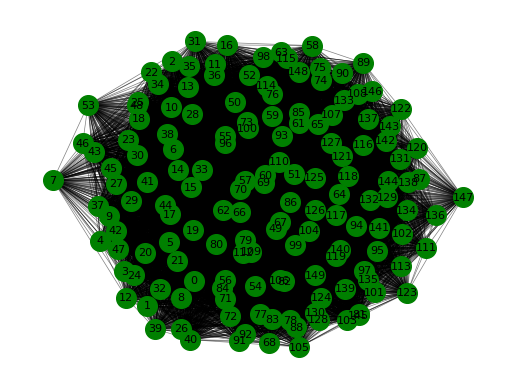

In [2239]:
import networkx as nx

G = nx.Graph()
for i in range(correlation_matrix_permuted.shape[0]):
    for j in range(i+1, correlation_matrix_permuted.shape[1]):
        weight = correlation_matrix_permuted[i][j]
        if weight >= threshold:
            G.add_edge(i, j, weight=weight)

# Calculate the weight of each node
node_weights = {node: sum(d['weight'] for _, _, d in G.edges(node, data=True)) for node in G.nodes()}

# Cluster the nodes based on their weights
clusters = []
while node_weights:
    max_node = max(node_weights, key=node_weights.get)
    cluster = [max_node]
    for neighbor in G.neighbors(max_node):
        if neighbor in node_weights:
            cluster.append(neighbor)
    clusters.append(cluster)
    for node in cluster:
        node_weights.pop(node)

# Visualize the clusters
colors = ['g', 'r', 'b', 'y', 'm']
pos = nx.spring_layout(G)
for i, cluster in enumerate(clusters):
    nx.draw_networkx_nodes(G, pos, nodelist=cluster, node_color=colors[i%len(colors)], node_size=200)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
plt.axis('off')
plt.show()